# Mandelbrot Set 

#### Plotting helpers

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from math import sqrt
import time
from tqdm.notebook import tqdm, trange

plt.rcParams['figure.figsize'] = [12, 8]

def plot_image(x, y, z, n_x, n_y, width=10, height=10, cmap='hot'):
    dpi = n_x // width
    fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)
    ax.set_xticks([])
    ax.set_yticks([])
    norm = colors.PowerNorm(0.3)
    ax.imshow(z, origin='lower', cmap=cmap, norm=norm)
    plt.show()

#### Mandelbrot analytics

In [25]:
# Inspired by
# https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en
# z_{i+1} = z_i^2 + c (all numbers are complex)
def mandelbrot_np(c, max_iterations):

    threshold = 2
    threshold_sq = threshold * threshold

    x_len = c.shape[0]
    y_len = c.shape[1]
    z = np.zeros((x_len, y_len), dtype=complex)
    m = np.full((x_len, y_len), True, dtype=bool)
    n = np.zeros((x_len, y_len), dtype=int)
    i = 0
    #while i < max_iterations:
    for i in trange(max_iterations):
        z[m] = z[m] * z[m] + c[m]
        m[z.real ** 2 + z.imag ** 2 > threshold_sq] = False
        i += 1
        n[m] = i
        #print("iteration = ", i)

    n[n == max_iterations] = 0
    print("\n")
    return n


def analyse_space(x_min, x_max, y_min, y_max, n_its, num_pxls):

    x_size: float = x_max - x_min
    y_size: float = y_max - y_min
    area_of_pxl: float = float(x_size * y_size) / num_pxls
    length_of_pxl: float = sqrt(area_of_pxl)
    x_num_points: int = int(x_size / length_of_pxl) + 1
    y_num_points: int = int(y_size / length_of_pxl) + 1

    x = np.linspace(x_min, x_max, num=x_num_points, endpoint=True).reshape((1, x_num_points))
    y = np.linspace(y_min, y_max, num=y_num_points, endpoint=True).reshape((y_num_points, 1))
    c = np.tile(x, (y_num_points, 1)) + 1j * np.tile(y, (1, x_num_points))

    start = time.time()
    res = mandelbrot_np(c, n_its)
    elapsed = time.time() - start

    print("Num pixels = ", num_pxls)
    print("Num x points = ", x_num_points)
    print("Num y points = ", y_num_points)
    print("Elapsed time = %.1f" % elapsed, "s")

    return x, y, res, x_num_points, y_num_points

#### Plots the Mandelbrot set in the square delimited by x_min, x_max, y_min and y_max 
#### The full mandelbrot set can be seen using -2, 1, -1, and 1 respectively
#### For each pixel (determined by n_pxls), it runs n_iterations




Num pixels =  1000000
Num x points =  1168
Num y points =  857
Elapsed time = 15.1 s


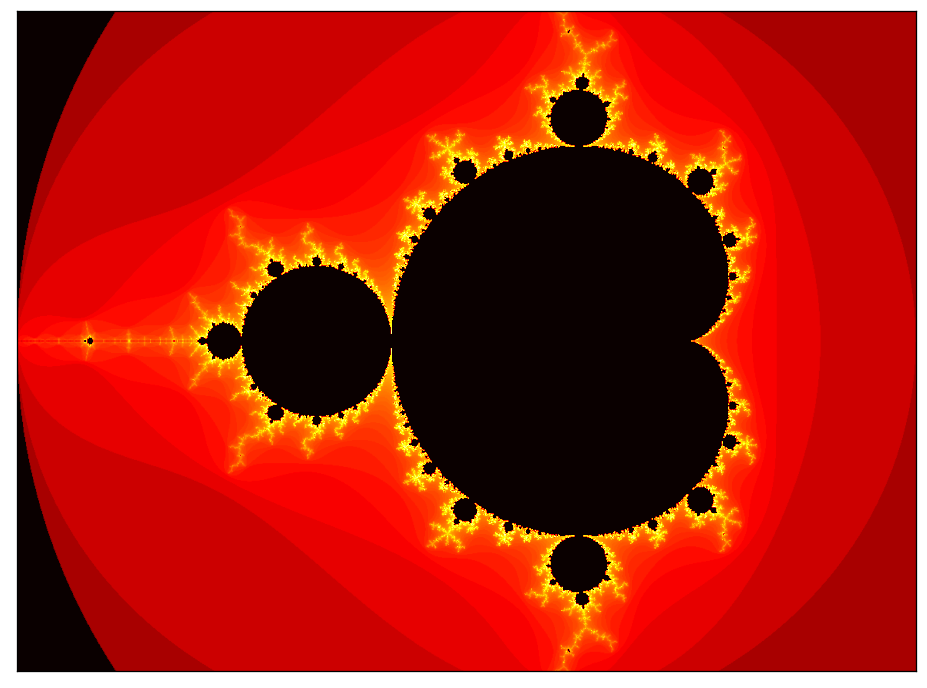

In [26]:
n_iterations = 124
n_pxls = 1000000
x_min = -2.0
x_max = 1.0
y_min = -1.1
y_max = 1.1

x, y, res, n_x, n_y = analyse_space(x_min, x_max, y_min, y_max, n_iterations, n_pxls)

plot_image(x.ravel(), y.ravel(), res, n_x, n_y)